In [1]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
print("Reading and Exploring data")
train_df = pd.read_csv("titanic.csv")
test_df = pd.read_csv("test.csv")
combine = [train_df, test_df]
combine

Reading and Exploring data


[      pclass  survived                                             name  \
 0        1.0       1.0                    Allen, Miss. Elisabeth Walton   
 1        1.0       1.0                   Allison, Master. Hudson Trevor   
 2        1.0       0.0                     Allison, Miss. Helen Loraine   
 3        1.0       0.0             Allison, Mr. Hudson Joshua Creighton   
 4        1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
 ...      ...       ...                                              ...   
 1305     3.0       0.0                            Zabour, Miss. Thamine   
 1306     3.0       0.0                        Zakarian, Mr. Mapriededer   
 1307     3.0       0.0                              Zakarian, Mr. Ortin   
 1308     3.0       0.0                               Zimmerman, Mr. Leo   
 1309     NaN       NaN                                              NaN   
 
          sex      age  sibsp  parch  ticket      fare    cabin embarked boat  \
 0   

In [4]:

print(train_df.columns.values)
print (test_df.columns.values)

['pclass' 'survived' 'name' 'sex' 'age' 'sibsp' 'parch' 'ticket' 'fare'
 'cabin' 'embarked' 'boat' 'body' 'home.dest']
['Loan_ID' 'Gender' 'Married' 'Dependents' 'Education' 'Self_Employed'
 'ApplicantIncome' 'CoapplicantIncome' 'LoanAmount' 'Loan_Amount_Term'
 'Credit_History' 'Property_Area']


In [5]:

train_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [6]:

train_df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
print("Data Analysis")
train_df.info()
print('_'*40)
test_df.info()

Data Analysis
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count 

In [8]:
train_df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [9]:
train_df.describe(include=['O'])

,name,sex,ticket,cabin,embarked,boat,home.dest
count,1309,1309,1309,295,1307,486,745
unique,1307,2,929,186,3,27,369
top,"Kelly, Mr. James",male,CA. 2343,C23 C25 C27,S,13,"New York, NY"
freq,2,843,11,6,914,39,64


In [10]:
print("Analyse by pivot table")
train_df[['pclass','survived']].groupby(['pclass'],as_index=False).mean()

Analyse by pivot table


,pclass,survived
0,1.0,0.619195
1,2.0,0.429603
2,3.0,0.255289


In [11]:
train_df[['pclass', 'survived']].groupby(['pclass'], as_index=False).mean().sort_values(by='survived', ascending=False)

,pclass,survived
0,1.0,0.619195
1,2.0,0.429603
2,3.0,0.255289


In [12]:
train_df[["sex", "survived"]].groupby(['sex'], as_index=False).mean().sort_values(by='survived', ascending=False)

,sex,survived
0,female,0.727468
1,male,0.190985


In [13]:
train_df[["sibsp", "survived"]].groupby(['sibsp'], as_index=False).mean().sort_values(by='survived', ascending=False)

,sibsp,survived
1,1.0,0.510972
2,2.0,0.452381
0,0.0,0.346801
3,3.0,0.300000
4,4.0,0.136364
5,5.0,0.000000
6,8.0,0.000000


In [14]:
train_df[["parch", "survived"]].groupby(['parch'], as_index=False).mean().sort_values(by='parch',ascending=True)

,parch,survived
0,0.0,0.335329
1,1.0,0.588235
2,2.0,0.504425
3,3.0,0.625000
4,4.0,0.166667
5,5.0,0.166667
6,6.0,0.000000
7,9.0,0.000000


In [15]:
train_df[['fare']].describe()

,fare
count,1308.000000
mean,33.295479
std,51.758668
min,0.000000
25%,7.895800
50%,14.454200
75%,31.275000
max,512.329200


Analyse by visualising Data


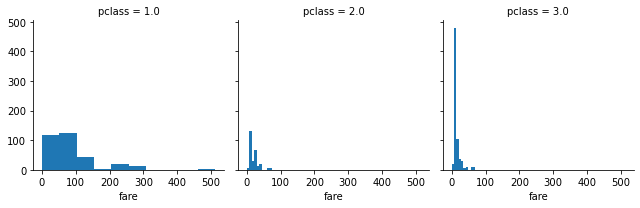

In [16]:
print("Analyse by visualising Data")

g = sns.FacetGrid(train_df, col='pclass')
g.map(plt.hist,'fare', bins=10)

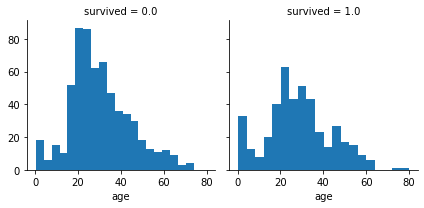

In [17]:

g = sns.FacetGrid(train_df, col='survived')
g.map(plt.hist, 'age', bins=20)

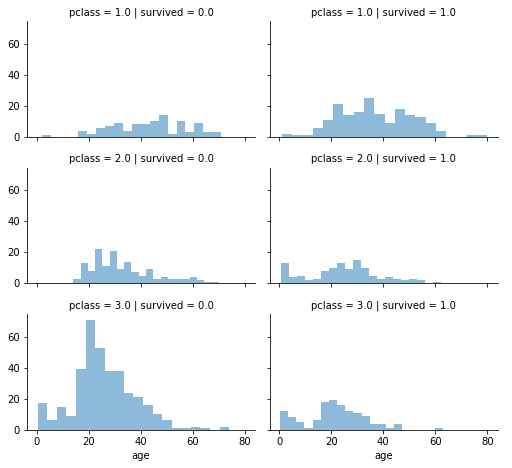

In [18]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='survived', row='pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

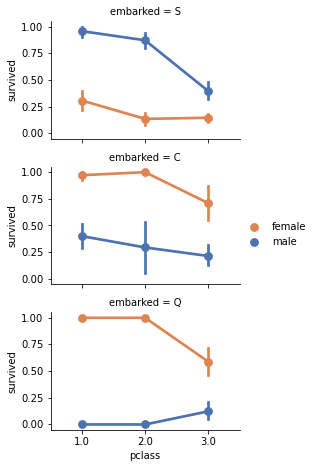

In [19]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'pclass', 'survived','sex', palette='deep')
grid.add_legend()

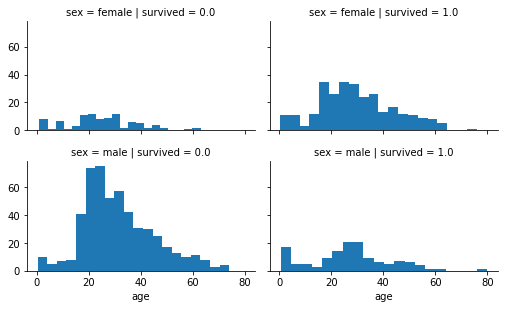

In [20]:
grid = sns.FacetGrid(train_df, row='sex', col='survived', size=2.2, aspect=1.6)
grid.map(plt.hist,'age',bins=20)
grid.add_legend();

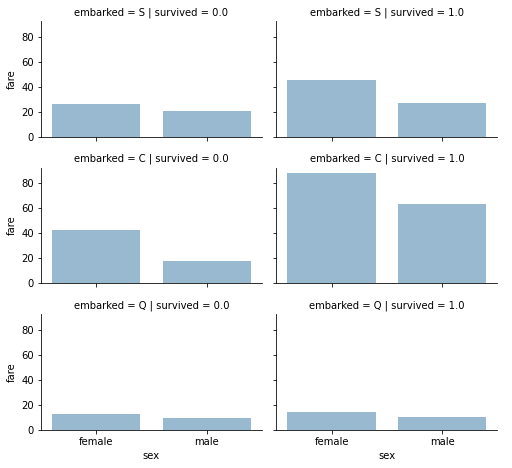

In [21]:
grid = sns.FacetGrid(train_df, row='embarked', col='survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'sex', 'fare', alpha=.5, ci=None)
grid.add_legend()